## MODEL TRAINING
 Model objective: Predict math score based on dataset variables.
 

Import libraries for model training

In [149]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
import warnings


In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
# create predictors data set
X = df.drop(columns=['math_score'],axis=1 ) # axis = 1 for column(col wise operation) , axis=0 for index (row wise ioperation)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
# create target variable 
Y=df['math_score']

In [7]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [18]:
X.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
reading_score                   int64
writing_score                   int64
dtype: object

In [25]:
# Separate pipelines for  numerical and categorical columns

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns



In [56]:
X.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   reading_score                1000 non-null   int64 
 6   writing_score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [57]:
X.shape 

(1000, 7)

In [27]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [59]:
#train test spilt 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((800, 7), (200, 7), (800,), (200,))

<bound method NDFrame.head of 29     62
535    66
695    79
557    61
836    73
       ..
106    87
270    69
860    53
435    50
102    85
Name: math_score, Length: 800, dtype: int64>

In [31]:
#preprocess 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [71]:
# VARIABLE TRANSFORM MODEL FOR TRAIN AND TEST VARIABLES
Preprocess_model=preprocessor.fit(X_train)


In [78]:
#transform X_train and X_test on 
X_train_transformed = Preprocess_model.transform(X_train)
X_test_transformed = Preprocess_model.transform(X_test)

In [142]:
X_train

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
29,female,group D,master's degree,standard,none,70,75
535,female,group C,bachelor's degree,free/reduced,completed,83,83
695,female,group D,some college,free/reduced,none,89,86
557,male,group C,master's degree,free/reduced,none,67,66
836,male,group E,high school,standard,none,64,57
...,...,...,...,...,...,...,...
106,female,group D,master's degree,standard,none,100,100
270,male,group C,bachelor's degree,standard,none,63,61
860,female,group C,associate's degree,standard,none,62,53
435,male,group C,some college,free/reduced,completed,48,53


In [141]:
X_train_transformed[1]

array([1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.9302895 , 0.96470125])

In [82]:
##  MODEL EVALUATION METRICS

#mae,rmse,rsquare

def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,rmse,r2

In [87]:
#models to use

models = { 
 "Linear Regression":LinearRegression(),
 "Lasso": Lasso(),
 "Ridge": Ridge(),
 "KNN" : KNeighborsRegressor(),
 "Decision Tree": DecisionTreeRegressor(),
 "Random Forest": RandomForestRegressor(),
 "XGB":XGBRegressor(),
 "Catboost":CatBoostRegressor(verbose=False),
 "AdaBoost":AdaBoostRegressor()
}

model_list=[]
r2_list=[]
mae_list=[]
rmse_list=[]


for i in range(len(models)):
    #train
    model=list(models.values())[i]
    model.fit(X_train_transformed,Y_train)
    
    #Predict
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred  = model.predict(X_test_transformed) 
    
    # Evaluate
    train_mae,train_rmse,train_r2 = evaluate_model(Y_train,y_train_pred)
    test_mae,test_rmse,test_r2 = evaluate_model(Y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('MODEL PERFORMANCE FOR TRAINING SET')
    print("- MAE : {:.4f} ".format(train_mae))
    print("- RMSE : {:.4f} ".format(train_rmse))
    print("- R2: {:.4f} ".format(train_r2))
    print('-'*35) 
    print('MODEL PERFORMANCE FOR TEST SET')
    print("- MAE : {:.4f} ".format(test_mae))
    print("- RMSE : {:.4f} ".format(test_rmse))
    print("- R2: {:.4f} ".format(test_r2))
    
    r2_list.append(test_r2)
    mae_list.append(test_mae)
    rmse_list.append(test_rmse)

    print('='*35)
    print('\n')

Linear Regression
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 4.2687 
- RMSE : 5.3250 
- R2: 0.8742 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 4.2335 
- RMSE : 5.4201 
- R2: 0.8793 


Lasso
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 5.2053 
- RMSE : 6.5925 
- R2: 0.8072 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 5.1557 
- RMSE : 6.5173 
- R2: 0.8254 


Ridge
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 4.2650 
- RMSE : 5.3233 
- R2: 0.8743 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 4.2111 
- RMSE : 5.3904 
- R2: 0.8806 


KNN
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 4.5025 
- RMSE : 5.6941 
- R2: 0.8562 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 5.5840 
- RMSE : 7.2148 
- R2: 0.7861 


Decision Tree
MODEL PERFORMANCE FOR TRAINING SET
- MAE : 0.0187 
- RMSE : 0.2795 
- R2: 0.9997 
-----------------------------------
MODEL PERFORMANCE FOR TEST SET
- MAE : 5.9

In [92]:
pd.DataFrame(list(zip(model_list, r2_list,mae_list,rmse_list)), columns=['Model Name', 'R2_Score','MAE SCORE','RMSE SCORE']).sort_values(by=["MAE SCORE"],ascending=True) #sorted by MAE least to max

#best model by all metrics is Ridge regression

,Model Name,R2_Score,MAE SCORE,RMSE SCORE
2,Ridge,0.880592,4.211113,5.390418
0,Linear Regression,0.879274,4.233496,5.420081
7,Catboost,0.851831,4.608758,6.004608
5,Random Forest,0.851858,4.653271,6.004058
8,AdaBoost,0.851148,4.743858,6.018431
6,XGB,0.827797,5.057731,6.473307
1,Lasso,0.825446,5.155720,6.517347
3,KNN,0.786089,5.584000,7.214763
4,Decision Tree,0.767217,5.925000,7.526287


In [109]:
alphas = 10**np.linspace(10,-2,100)*0.5


array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [118]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_transformed, Y_train)
ridgecv.alpha_

1.7555958671075638

In [120]:
from sklearn.metrics import PredictionErrorDisplay


ridge_alpha_tuned= Ridge(alpha = ridgecv.alpha_)
ridge_alpha_tuned.fit(X_train_transformed, Y_train)
mean_absolute_error(Y_test,ridge_alpha_tuned.predict(X_test_transformed))

4.2089579198330105

In [139]:



pd.DataFrame(list(zip(pd.DataFrame(X_train_transformed),ridge_alpha_tuned.coef_)),columns=['FEATURES','WEIGHTS'])

,FEATURES,WEIGHTS
0,0,-6.472035
1,1,6.472035
2,2,-0.787907
3,3,-0.447157
4,4,-1.419163
5,5,-1.366783
6,6,4.021010
7,7,-0.094861
8,8,-0.765949
9,9,0.788029


In [170]:
y_pred = ridge_alpha_tuned.predict(X_test_transformed)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.07


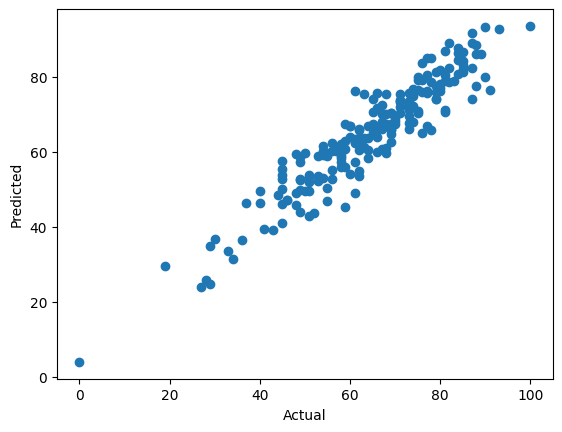

In [171]:
#scatter plot
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

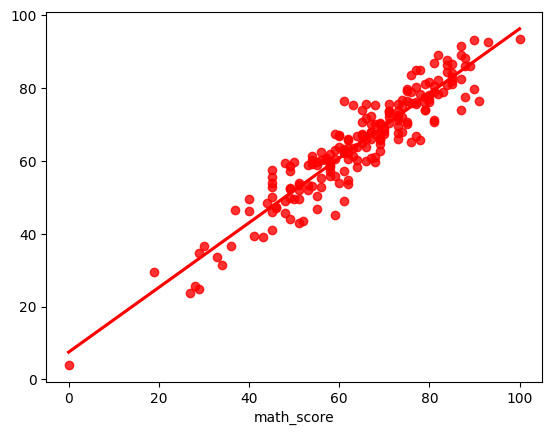

In [172]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

In [175]:
#diff 
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.406372,14.593628
737,53,58.814081,-5.814081
740,80,76.992471,3.007529
660,74,76.772445,-2.772445
411,84,87.603893,-3.603893
...,...,...,...
408,52,43.552372,8.447628
332,62,62.182067,-0.182067
208,74,67.925697,6.074303
613,65,67.089321,-2.089321
